In [1]:
import pystan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dIdt = pd.read_csv("/home/marcio/Projects/R0_uncertainty/R0_uncertainty/data/influenza_boarding_school.csv")

In [3]:
y = dIdt['in_bed'].values

In [4]:
ab = 1
bb = 1
ag = 1
bg = 1
αs = 1
βs = 1

In [5]:
μ_b = (3 / 2) * (np.log(ab / bb)) - np.log((1 / bb) + 1);
σ_b = np.sqrt(np.log(((1 / bb) + 1) * bb / ab));

μ_g = (3 / 2) * (np.log(ag / bg)) - np.log((1 / bg) + 1);
σ_g = np.sqrt(np.log(((1 / bg) + 1) * bg / ag));

In [6]:
model_data = {'n_obs': y.size,
              't0': 0, 
              'ts': np.arange(y.size) + 0.001,
              'y_init': 0.01,
              'y': y,
              'mu_beta': μ_b,
              'sigma_beta': σ_b,
              'mu_gamma': μ_g,
              'sigma_gamma': σ_g,
              'as': αs,
              'bs': βs
              }

In [7]:
sm = pystan.StanModel(file='/home/marcio/Projects/R0_uncertainty/R0_uncertainty/code/stan/sir_simple_I(t).stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_89c925597b1d09d6a0b721e757dfe0a5 NOW.


In [8]:
fit = sm.sampling(data=model_data, iter=5000, chains=1, verbose=True, n_jobs=2)

In [9]:
print(fit)

Inference for Stan model: anon_model_89c925597b1d09d6a0b721e757dfe0a5.
1 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=2500.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
r_init[1]      0.5  5.0e-3   0.29   0.02   0.24   0.49   0.75   0.97   3396    1.0
r_init[2]      0.5  5.0e-3   0.29   0.02   0.25    0.5   0.75   0.97   3242    1.0
beta          1.12    0.02   0.97   0.18   0.52   0.86   1.39   3.68   2051    1.0
gamma         0.01  9.7e-5 5.5e-3 6.0e-3   0.01   0.01   0.02   0.03   3253    1.0
S0            0.17  3.2e-3   0.15 4.4e-3   0.05   0.12   0.25   0.57   2344    1.0
sigma          1.0  6.6e-5 3.9e-3   0.99   0.99    1.0    1.0    1.0   3450    1.0
R0           89.97    1.96  90.56  11.58  36.52  64.29 111.08 322.46   2146    1.0
y_hat[1,1]    0.17  3.2e-3   0.15 4.4e-3   0.05   0.12   0.25   0.57   2345    1.0
y_hat[2,1]    0.07  1.2e-3   0.07 1.4e-3   0.02   0.05    0.1   

In [10]:
import arviz as az

In [11]:
data = az.from_pystan(posterior=fit)

/home/marcio/Projects/R0_uncertainty/R0_uncertainty_env/lib/python3.6/site-packages/arviz/plots/traceplot.py:156: SyntaxWarning: max_plots is smaller than the number of variables to plot generating only max_plots traceplots
  SyntaxWarning,


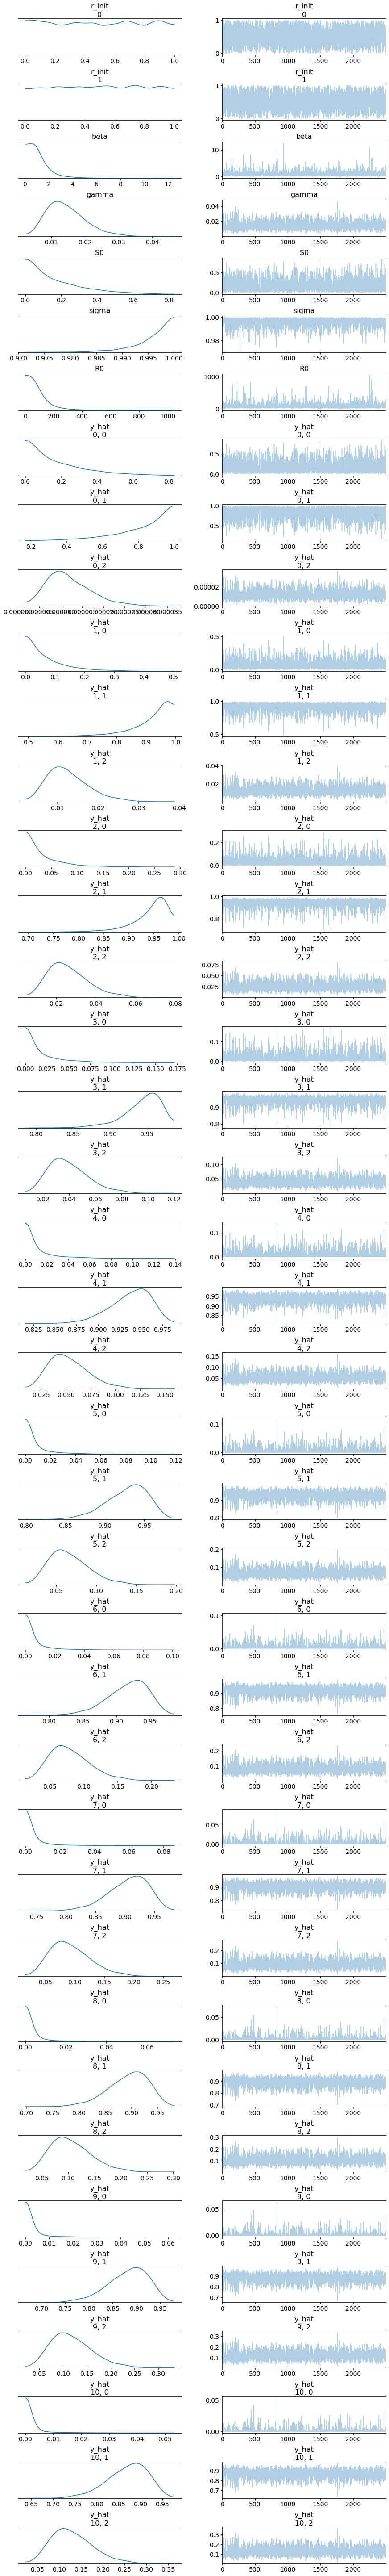

In [12]:
az.plot_trace(data);